In [1]:
import tensorflow as tf
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255., x_test/255.
validation_data = x_test, y_test

11493376/11490434 [==============================] - 6s 1us/step


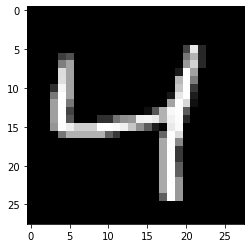

In [5]:
image = x_train[2]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
model = Sequential([Reshape((28, 28, 1)),
                    Conv2D(filters=64,
                           kernel_size=(3,3),
                           activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
                   ])
model.compile(optimizer='sgd',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy',])
model.fit(x = x_train,
          y = y_train,
          epochs = 10,
          validation_data = validation_data)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4793 - accuracy: 0.8709 - val_loss: 0.2424 - val_accuracy: 0.9274
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2184 - accuracy: 0.9358 - val_loss: 0.1700 - val_accuracy: 0.9482
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1657 - accuracy: 0.9509 - val_loss: 0.1387 - val_accuracy: 0.9604
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1348 - accuracy: 0.9594 - val_loss: 0.1118 - val_accuracy: 0.9661
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1125 - accuracy: 0.9667 - val_loss: 0.0981 - val_accuracy: 0.9696
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0972 - accuracy: 0.9712 - val_loss: 0.0928 - val_accuracy: 0.9711
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0866 - accuracy: 0.9740 - val_loss: 0.0997 - val_ac

313/313 [==============================] - 1s 2ms/step - loss: 0.0683 - accuracy: 0.9788


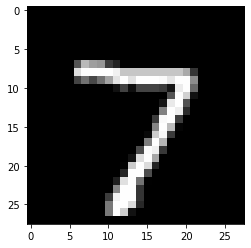

Prediction: 7


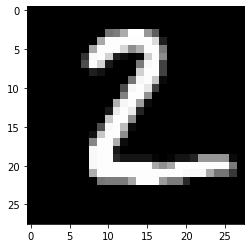

Prediction: 2


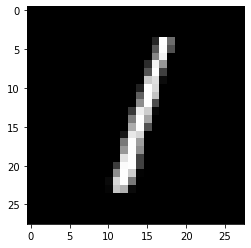

Prediction: 1


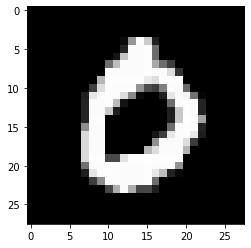

Prediction: 0


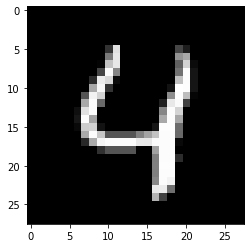

Prediction: 4


In [8]:
model.evaluate(x_test, y_test)
predictions = model.predict(x_test)
for i in range(5):
    image = x_test[i];
    fig = plt.figure
    plt.imshow(image, cmap='gray')
    plt.show()
    print('Prediction: '+ str(np.argmax(predictions[i])))


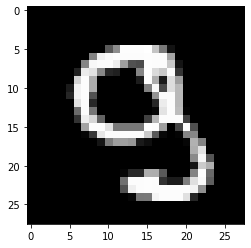

Actual: 9 but Prediction: 8


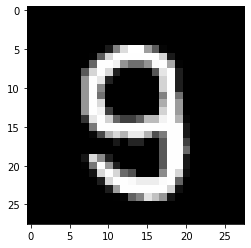

Actual: 9 but Prediction: 5


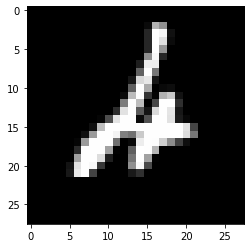

Actual: 4 but Prediction: 2


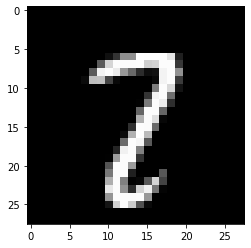

Actual: 2 but Prediction: 7


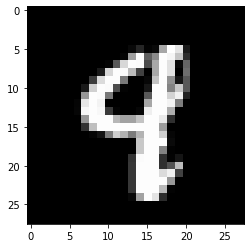

Actual: 9 but Prediction: 4


In [9]:
count = 0
for i in range(len(y_test)):
    if (y_test[i] != np.argmax(predictions[i])):
        image = x_test[i];
        fig = plt.figure
        plt.imshow(image, cmap='gray')
        plt.show()
        print('Actual: ' + str(y_test[i]) + ' but Prediction: '+ str(np.argmax(predictions[i])))
        count += 1
    if count == 5:
        break


In [10]:
count = 0
for i in range(len(y_test)):
    if (y_test[i] != np.argmax(predictions[i])):
        count += 1
print("Total: ", str(len(y_test)), ", mismatches:", str(count))


Total:  10000 , mismatches: 212
